
Reduzierte Daten (erste paar Hauptkomponenten):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.133338 -1.098099  0.470928  1.484456 -0.694501 -0.175489 -0.998692   
1 -3.639356 -0.967073 -1.479598 -0.194476 -1.635971 -0.376687 -1.587008   
2 -3.001551 -0.748270 -0.134715  0.454660 -0.439940  1.431076  0.361709   
3 -2.475745 -1.234820 -0.703551  0.925185 -1.110441  1.156819 -0.606127   
4 -1.476608 -1.104922 -0.457903  0.775883 -1.185552 -0.064629 -1.123069   

        PC8       PC9      PC10  
0  0.275597  1.224020 -0.392106  
1 -0.050210 -0.147037 -0.182889  
2 -0.422228  0.271610 -0.348742  
3 -0.404095 -0.919990 -0.086676  
4  0.899300  1.384970 -0.515383  


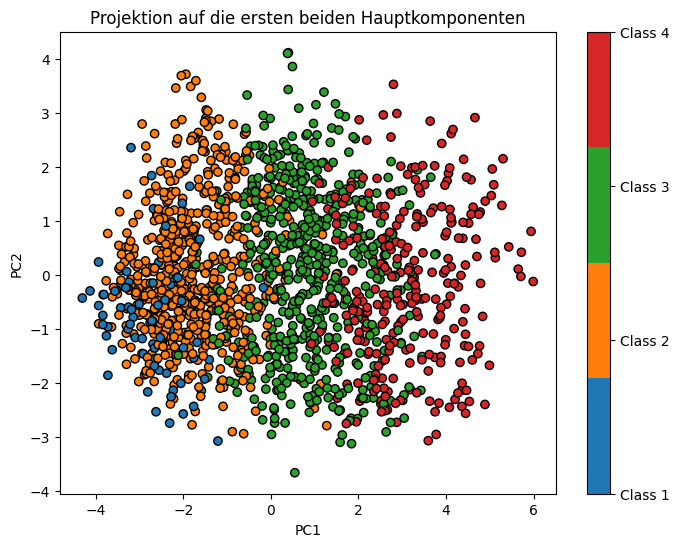


Erklärte Varianz pro Hauptkomponente:
[0.25744716 0.10729234 0.10010696 0.0929951  0.07232486 0.05801199
 0.05438279 0.04819378 0.04482855 0.03872003]


In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Deine Daten laden
file_path = r"C:\Users\doria\OneDrive\Dokumente\HFT\Digitale Prozesse und Technologien\1. Semester\Data Analytics\Obesity_Dataset_FE.xlsx"
data = pd.read_excel(file_path)

# Wir entfernen die Zielvariable (Class) und andere nicht-numerische Variablen
# Nur numerische Spalten werden für PCA verwendet
features = data.select_dtypes(include=[float, int]).drop(columns=["Class"])

# Sicherstellen, dass 'Class' eine ganze Zahl ist (numerische Kodierung)
data["Class"] = data["Class"].astype('category').cat.codes

# Wenn mehr als vier Klassen vorhanden sind, auf die ersten vier Klassen beschränken
data["Class"] = data["Class"].apply(lambda x: x if x < 4 else 3)  # Setzt alle Werte über 3 auf 3

# Pipeline erstellen
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisierung
    ('pca', PCA(n_components=0.85))  # PCA mit 85% erklärter Varianz
])

# Anwendung der Pipeline auf die Daten
reduced_data = pipeline.fit_transform(features)

# Ergebnis: Reduzierte Daten
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(reduced_data.shape[1])])

print("\nReduzierte Daten (erste paar Hauptkomponenten):")
print(reduced_df.head())

# Visualisierung der ersten beiden Hauptkomponenten mit einer diskreten Farbskala
plt.figure(figsize=(8, 6))

# Farbkarte "tab10" auf 4 Farben beschränken
cmap = ListedColormap(plt.cm.tab10.colors[:4])  # Nur die ersten 4 Farben von "tab10" verwenden

# Scatter-Plot erstellen
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data["Class"], cmap=cmap, edgecolor='k')

plt.title("Projektion auf die ersten beiden Hauptkomponenten")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Farbskala anpassen und mit Labels "Class 1", etc.
class_labels = [f"Class {i+1}" for i in range(4)]  # Hier auf 4 Klassen beschränken
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1, 2, 3])  # Setzt die Positionen der Ticks auf 0, 1, 2, 3
cbar.set_ticklabels(class_labels)  # Setzt die Beschriftungen der Ticks

plt.show()

# Optionale Ausgabe der erklärten Varianz
pca = pipeline.named_steps['pca']  # Zugriff auf PCA-Teil der Pipeline
print("\nErklärte Varianz pro Hauptkomponente:")
print(pca.explained_variance_ratio_)

